# Transmission Rate

Transmission Rate is the speed at which a disease spreads from the first person or the initial case IN A TIME

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

tweetSet='twitter16'
# Define the path to your text file
#file_path = './Data/twitter16/label.txt'
file_path = './Data/'+tweetSet+'/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['false' 'true']


,Label,SourceTweetID
0,False,656955120626880512
1,True,615689290706595840
2,False,613404935003217920
5,True,614467824313106432
9,False,622891631293935616
...,...,...
799,True,552806757672964097
801,True,544350567183556608
805,True,614593386188828672
811,True,650046859537448960


In [2]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
#df_filtered_dict[656955120626880512]
# bool(dict_of_lists[656955120626880512])

## Getting Maximum Length Of Rumors That Is True For Twitter 16

In [3]:
rumor_tweet_id= df_filtered['SourceTweetID'].unique()

In [4]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/'+tweetSet+'/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
number_of_participants=[]
incidents_count=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        #sender_tweet_id.append(filename.replace(".txt",""))
        #tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
        delayVal=0
        count=0
        #print(filename.replace(".txt","") ,' is present')
        Current_Sender_uid=""
        Current_receiver_list=set()
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                if sender_values[0]=='ROOT':
                    Current_Sender_uid=receiver_values[0]
                    Current_receiver_list.add(Current_Sender_uid)
                    
                
                #if receiver_values[0]!=Current_Sender_uid:
                if receiver_values[0] not in Current_receiver_list:
                    Current_receiver_list.add(receiver_values[0])
                    count=count+1
                    number_of_participants.append(count)
                    receiver_post_time_delay.append(float(receiver_values[2]))
                    sender_tweet_id.append(filename.replace(".txt",""))
                    tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
                
                        
#                 if sender_values[0]!='ROOT':
#                     if float(receiver_values[2]) >delayVal:
#                         delayVal=float(receiver_values[2])
#                 sender_uid.append(sender_values[0])
#                 sender_tweet_id.append(sender_values[1])
#                 sender_post_time_delay.append(float(sender_values[2]))

#                 receiver_uid.append(receiver_values[0])
#                 receiver_tweet_id.append(receiver_values[1])
#                 receiver_post_time_delay.append(float(receiver_values[2]))
                
#                 #print(int(filename.replace(".txt","")))
#                 tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
            #receiver_post_time_delay.append(delayVal)
            #number_of_participants.append(len(Current_receiver_list))

print(len(number_of_participants))
# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_tweet_id': sender_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label,
    'Participant_count':number_of_participants
})
# dfRoot=df_Joined[df_Joined['sender_uid'] == 'ROOT']
# df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

159560


,sender_tweet_id,receiver_post_time_delay,tweet_label,Participant_count
0,498430783699554305,0.30,True,1
1,498430783699554305,1.00,True,2
2,498430783699554305,1.00,True,3
3,498430783699554305,2.70,True,4
4,498430783699554305,2.85,True,5
...,...,...,...,...
159555,681767380305985536,626.48,False,108
159556,681767380305985536,1644.97,False,109
159557,681767380305985536,2088.33,False,110
159558,681767380305985536,2121.45,False,111


In [5]:
true_data = df_Joined[(df_Joined['tweet_label'] == True ) & (df_Joined['receiver_post_time_delay']<1440)]
false_data = df_Joined[(df_Joined['tweet_label'] == False) & (df_Joined['receiver_post_time_delay']<1440)]
true_data.sort_values(by='receiver_post_time_delay')
true_data = true_data.reset_index(drop=True)
true_data

,sender_tweet_id,receiver_post_time_delay,tweet_label,Participant_count
0,498430783699554305,0.30,True,1
1,498430783699554305,1.00,True,2
2,498430783699554305,1.00,True,3
3,498430783699554305,2.70,True,4
4,498430783699554305,2.85,True,5
...,...,...,...,...
80446,681147789653356544,1235.75,True,277
80447,681147789653356544,1288.12,True,278
80448,681147789653356544,1390.05,True,279
80449,681147789653356544,1392.02,True,280


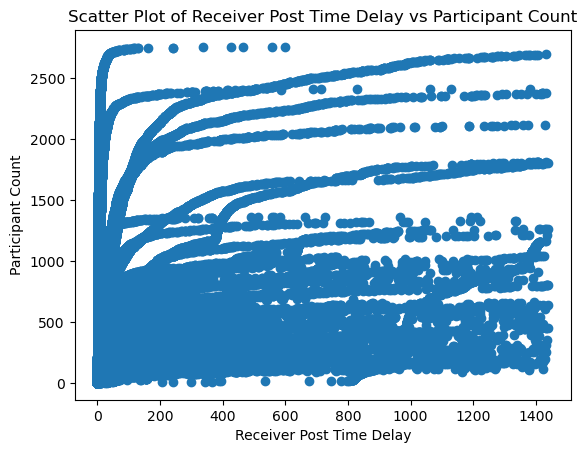

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns sender_tweet_id, receiver_post_time_delay, and Participant_count

# Create a scatter plot
plt.scatter(true_data['receiver_post_time_delay'], true_data['Participant_count'])

# Add labels and title
plt.xlabel('Receiver Post Time Delay')
plt.ylabel('Participant Count')
plt.title('Scatter Plot of Receiver Post Time Delay vs Participant Count')

# Show the plot
plt.show()


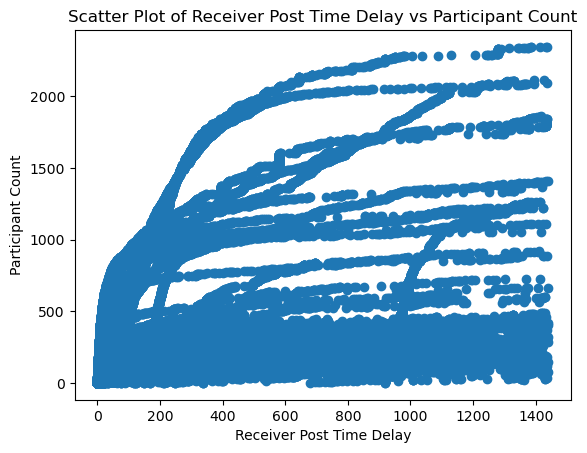

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns sender_tweet_id, receiver_post_time_delay, and Participant_count

# Create a scatter plot
plt.scatter(false_data['receiver_post_time_delay'], false_data['Participant_count'])

# Add labels and title
plt.xlabel('Receiver Post Time Delay')
plt.ylabel('Participant Count')
plt.title('Scatter Plot of Receiver Post Time Delay vs Participant Count')

# Show the plot
plt.show()


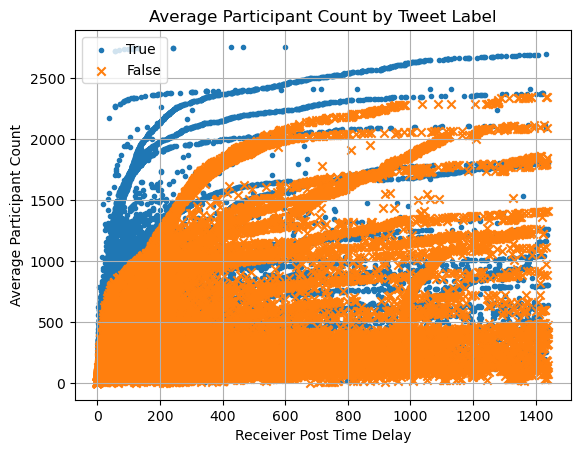

In [8]:
 


import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns receiver_post_time_delay, tweet_label, and Participant_count

# Group the data by 'tweet_label' and calculate the average of 'Participant_count' for each category
grouped = df_Joined.groupby('tweet_label')['Participant_count'].mean()

# Separate the data into True and False categories
true_data = df_Joined[(df_Joined['tweet_label'] == True ) & (df_Joined['receiver_post_time_delay']<1440)]
false_data = df_Joined[(df_Joined['tweet_label'] == False ) & (df_Joined['receiver_post_time_delay']<1440)]

# Group the True and False data by 'receiver_post_time_delay' and calculate the average 'Participant_count'
true_grouped = true_data.groupby('receiver_post_time_delay')['Participant_count'].mean()
false_grouped = false_data.groupby('receiver_post_time_delay')['Participant_count'].mean()

# Create a line chart for both True and False values
plt.scatter(true_grouped.index, true_grouped.values, label='True', marker='.')
plt.scatter(false_grouped.index, false_grouped.values, label='False', marker='x')

plt.xlabel('Receiver Post Time Delay')
plt.ylabel('Average Participant Count')
plt.title('Average Participant Count by Tweet Label')
plt.legend()
plt.grid(True)

plt.show()



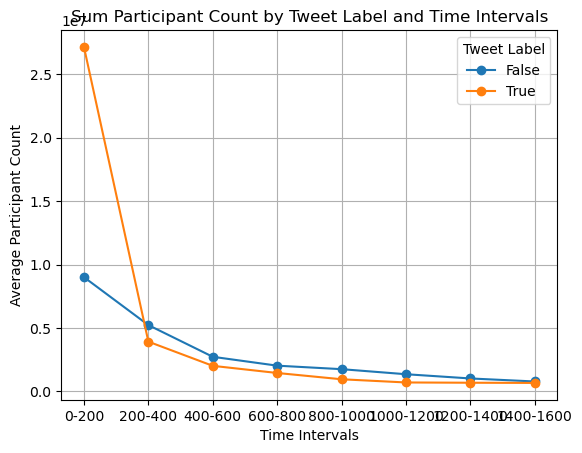

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns receiver_post_time_delay, tweet_label, and Participant_count

# Define the intervals for bucketing
intervals = [0,200,400,600,800,1000,1200,1400,1600]  # You can customize these intervals

# Create labels for the intervals (e.g., 0-0.5, 0.5-1, etc.)
labels = [f'{intervals[i]}-{intervals[i+1]}' for i in range(len(intervals) - 1)]

# Bucket 'receiver_post_time_delay' into intervals using 'cut'
df_Joined['Interval'] = pd.cut(df_Joined['receiver_post_time_delay'], bins=intervals, labels=labels)

# Group the data by 'tweet_label' and 'Interval', and calculate the average 'Participant_count'
grouped = df_Joined.groupby(['tweet_label', 'Interval'])['Participant_count'].sum().unstack()

# Create a line chart to compare the average 'Participant_count' for True and False tweet_labels in different intervals
ax = grouped.T.plot(marker='o')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Average Participant Count')
ax.set_title('Sum Participant Count by Tweet Label and Time Intervals')
plt.legend(title='Tweet Label')
plt.grid(True)
plt.show()


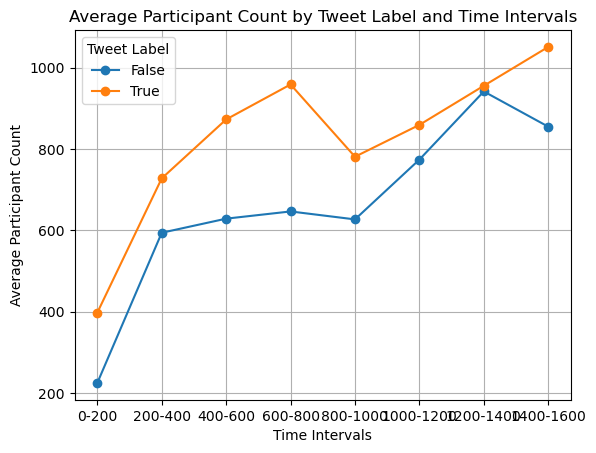

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns receiver_post_time_delay, tweet_label, and Participant_count

# Define the intervals for bucketing
intervals = [0,200,400,600,800,1000,1200,1400,1600]  # You can customize these intervals

# Create labels for the intervals (e.g., 0-0.5, 0.5-1, etc.)
labels = [f'{intervals[i]}-{intervals[i+1]}' for i in range(len(intervals) - 1)]

# Bucket 'receiver_post_time_delay' into intervals using 'cut'
df_Joined['Interval'] = pd.cut(df_Joined['receiver_post_time_delay'], bins=intervals, labels=labels)

# Group the data by 'tweet_label' and 'Interval', and calculate the average 'Participant_count'
grouped = df_Joined.groupby(['tweet_label', 'Interval'])['Participant_count'].mean().unstack()

# Create a line chart to compare the average 'Participant_count' for True and False tweet_labels in different intervals
ax = grouped.T.plot(marker='o')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Average Participant Count')
ax.set_title('Average Participant Count by Tweet Label and Time Intervals')
plt.legend(title='Tweet Label')
plt.grid(True)
plt.show()


In [11]:
df_Joined.groupby(['tweet_label', 'Interval'])['Participant_count'].sum().unstack()

Interval,0-200,200-400,400-600,600-800,800-1000,1000-1200,1200-1400,1400-1600
tweet_label,,,,,,,,
False,9009174,5229615,2729481,2030362,1753397,1354822,1021282,782042
True,27163863,3923845,2016302,1453078,957181,705309,683961,669356


In [12]:
df_Joined.groupby(['tweet_label', 'Interval'])['Participant_count'].mean().unstack()

Interval,0-200,200-400,400-600,600-800,800-1000,1000-1200,1200-1400,1400-1600
tweet_label,,,,,,,,
False,224.522105,593.802089,628.478241,646.200509,626.660829,773.741862,941.273733,854.690710
True,397.417199,727.581124,872.480312,958.494723,780.734910,859.085262,955.252793,1050.794349


In [13]:
pd.cut(df_Joined['receiver_post_time_delay'], bins=intervals, labels=labels).tail(2000).head(40)

157560    1400-1600
157561    1400-1600
157562          NaN
157563          NaN
157564          NaN
157565          NaN
157566          NaN
157567          NaN
157568          NaN
157569          NaN
157570          NaN
157571          NaN
157572          NaN
157573          NaN
157574          NaN
157575          NaN
157576          NaN
157577          NaN
157578          NaN
157579          NaN
157580          NaN
157581          NaN
157582          NaN
157583          NaN
157584          NaN
157585          NaN
157586          NaN
157587          NaN
157588          NaN
157589          NaN
157590          NaN
157591          NaN
157592          NaN
157593          NaN
157594          NaN
157595        0-200
157596        0-200
157597        0-200
157598        0-200
157599        0-200
Name: receiver_post_time_delay, dtype: category
Categories (8, object): ['0-200' < '200-400' < '400-600' < '600-800' < '800-1000' < '1000-1200' < '1200-1400' < '1400-1600']

In [14]:
df_Joined.groupby(['tweet_label', 'Interval'])['Participant_count'].sum()

tweet_label  Interval 
False        0-200         9009174
             200-400       5229615
             400-600       2729481
             600-800       2030362
             800-1000      1753397
             1000-1200     1354822
             1200-1400     1021282
             1400-1600      782042
True         0-200        27163863
             200-400       3923845
             400-600       2016302
             600-800       1453078
             800-1000       957181
             1000-1200      705309
             1200-1400      683961
             1400-1600      669356
Name: Participant_count, dtype: int64

In [15]:
true_data

,sender_tweet_id,receiver_post_time_delay,tweet_label,Participant_count
0,498430783699554305,0.30,True,1
1,498430783699554305,1.00,True,2
2,498430783699554305,1.00,True,3
3,498430783699554305,2.70,True,4
4,498430783699554305,2.85,True,5
...,...,...,...,...
159436,681147789653356544,1235.75,True,277
159437,681147789653356544,1288.12,True,278
159438,681147789653356544,1390.05,True,279
159439,681147789653356544,1392.02,True,280


In [16]:
true_data.groupby('receiver_post_time_delay')['Participant_count'].mean()

receiver_post_time_delay
0.02          1.000000
0.05          1.000000
0.08          1.125000
0.10          2.357143
0.11          2.000000
              ...     
1438.85    1263.000000
1439.02     452.000000
1439.25     802.000000
1439.27    1801.000000
1439.68     638.000000
Name: Participant_count, Length: 23235, dtype: float64

In [17]:
transmission_rate = true_data['Participant_count'].diff().sum()*1000 / true_data['receiver_post_time_delay'].sum()
transmission_rate

0.030514691497656853

In [18]:
transmission_rate = false_data['Participant_count'].diff().sum()*1000 / false_data['receiver_post_time_delay'].sum()
transmission_rate
false_data['receiver_post_time_delay'].sum()

15157066.02

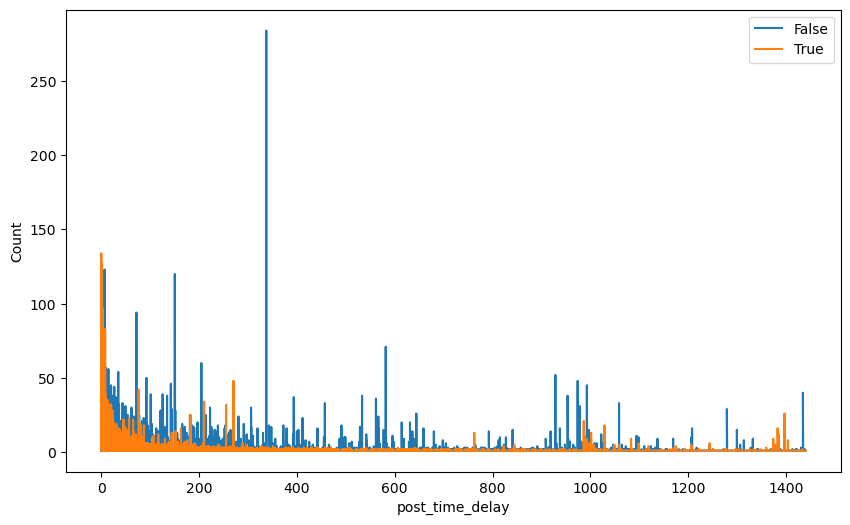

In [19]:
# Group the data by 'post_time_delay' and count the occurrences
grouped_data_true = true_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()
grouped_data_false = false_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the values as needed


plt.plot(grouped_data_false['receiver_post_time_delay'], grouped_data_false['tweet_label'], label='False')
plt.plot(grouped_data_true['receiver_post_time_delay'], grouped_data_true['tweet_label'], label='True')

plt.xlabel('post_time_delay')
plt.ylabel('Count')
plt.legend()  # Add a legend to differentiate between 'True' and 'False' lines

# Show the line chart
plt.show()

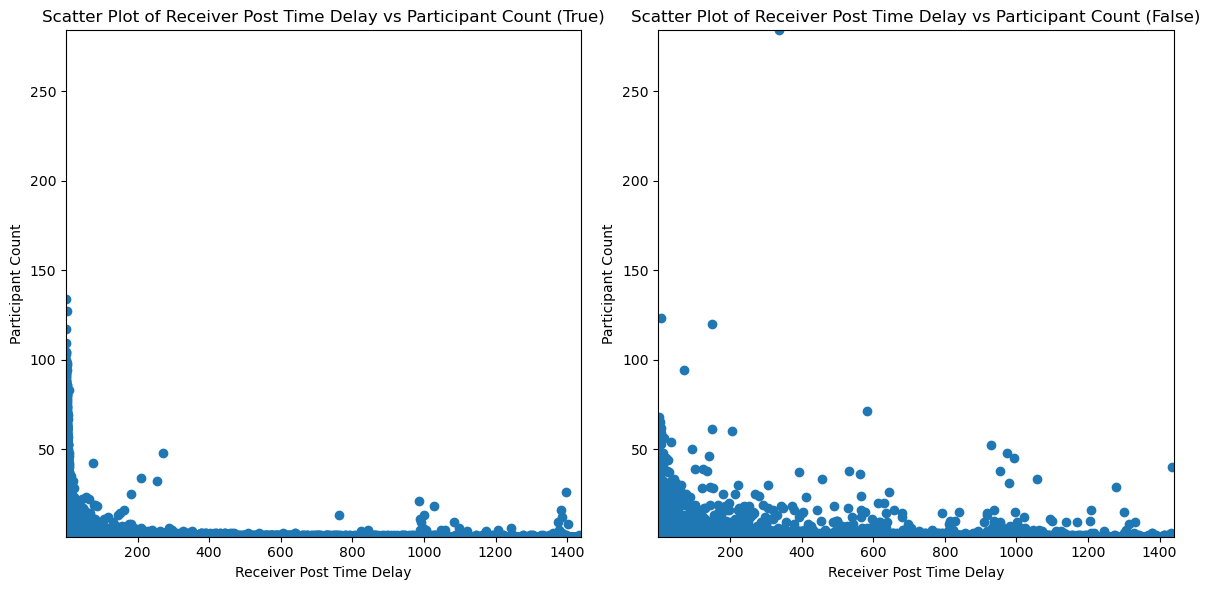

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming grouped_data_true and grouped_data_false DataFrames exist

# Get the min and max values for scaling
x_min = min(grouped_data_true['receiver_post_time_delay'].min(), grouped_data_false['receiver_post_time_delay'].min())
x_max = max(grouped_data_true['receiver_post_time_delay'].max(), grouped_data_false['receiver_post_time_delay'].max())
y_min = min(grouped_data_true['tweet_label'].min(), grouped_data_false['tweet_label'].min())
y_max = max(grouped_data_true['tweet_label'].max(), grouped_data_false['tweet_label'].max())

# Create subplots with shared x and y limits
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot
axes[0].scatter(grouped_data_true['receiver_post_time_delay'], grouped_data_true['tweet_label'])
axes[0].set_xlabel('Receiver Post Time Delay')
axes[0].set_ylabel('Participant Count')
axes[0].set_title('Scatter Plot of Receiver Post Time Delay vs Participant Count (True)')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Second scatter plot
axes[1].scatter(grouped_data_false['receiver_post_time_delay'], grouped_data_false['tweet_label'])
axes[1].set_xlabel('Receiver Post Time Delay')
axes[1].set_ylabel('Participant Count')
axes[1].set_title('Scatter Plot of Receiver Post Time Delay vs Participant Count (False)')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Twitter 15

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Define the path to your text file
file_path = './Data/twitter15/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['true' 'false']


,Label,SourceTweetID
4,True,551099691702956032
7,True,514106273852174337
9,False,495366618818830336
10,False,532206910796468224
11,False,560187970389819392
...,...,...
1480,True,528242965915779072
1481,True,407205235682050048
1482,True,508002575858561024
1484,True,427780584979836929


In [22]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
# df_filtered_dict[656955120626880512]
# bool(dict_of_lists[656955120626880512])

## Getting Maximum Length Of Rumors That Is True For Twitter 15

In [23]:
rumor_tweet_id= df_filtered['SourceTweetID'].unique()

In [24]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter15/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                sender_uid.append(sender_values[0])
                sender_tweet_id.append(sender_values[1])
                sender_post_time_delay.append(float(sender_values[2]))

                receiver_uid.append(receiver_values[0])
                receiver_tweet_id.append(receiver_values[1])
                receiver_post_time_delay.append(float(receiver_values[2]))
                
                #print(int(filename.replace(".txt","")))
                tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label
})
df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
1,39364684,265953285247209472,0.00,21061006,265953402234748928,0.45,False
2,39364684,265953285247209472,0.00,18513522,265953502839308289,0.85,False
3,39364684,265953285247209472,0.00,38251731,265953577145614336,1.15,False
4,39364684,265953285247209472,0.00,22369434,265953587149021185,1.20,False
5,39364684,265953285247209472,0.00,98928660,265953639959506944,1.40,False
...,...,...,...,...,...,...,...
257421,24767833,91728807081426944,2372812.17,152746927,91728807081426944,2437586.77,False
257422,251183505,91728807081426944,2372738.45,114914347,91728807081426944,2437688.90,False
257423,170886667,91728807081426944,0.00,2875882289,91728807081426944,2437696.77,False
257424,3313577574,91728807081426944,2373153.65,502385408,91728807081426944,2453166.52,False


In [25]:
true_data = df_Joined[(df_Joined['tweet_label'] == True ) & (df_Joined['receiver_post_time_delay']<1440)  & (df_Joined['receiver_post_time_delay']>=0)]
false_data = df_Joined[(df_Joined['tweet_label'] == False) & (df_Joined['receiver_post_time_delay']<1440)  & (df_Joined['receiver_post_time_delay']>=0)]
true_data.sort_values(by='receiver_post_time_delay')
true_data = true_data.reset_index(drop=True)
true_data

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
0,20003448,295152287901417472,0.0,598415412,295152495146184704,0.83,True
1,20003448,295152287901417472,0.0,438384029,295152287901417472,0.88,True
2,20003448,295152287901417472,0.0,237267675,295152287901417472,0.88,True
3,20003448,295152287901417472,0.0,508006338,295152287901417472,0.88,True
4,20003448,295152287901417472,0.0,493390865,295152287901417472,0.88,True
...,...,...,...,...,...,...,...
113532,28785486,574062768896212992,0.0,28240039,574062768896212992,667.45,True
113533,28785486,574062768896212992,0.0,428328096,574062768896212992,791.35,True
113534,28785486,574062768896212992,0.0,1334522816,574280909194674177,866.82,True
113535,28785486,574062768896212992,0.0,474927729,574062768896212992,1216.87,True


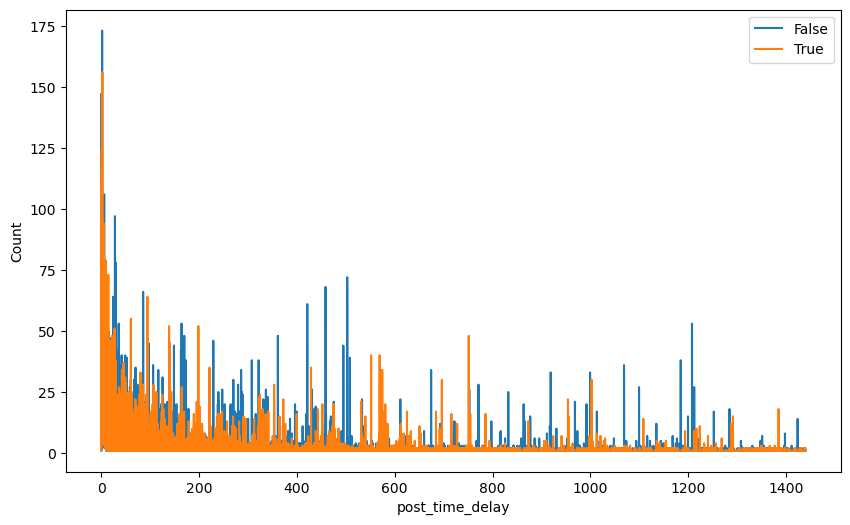

In [26]:
# Group the data by 'post_time_delay' and count the occurrences
grouped_data_true = true_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()
grouped_data_false = false_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the values as needed


plt.plot(grouped_data_false['receiver_post_time_delay'], grouped_data_false['tweet_label'], label='False')
plt.plot(grouped_data_true['receiver_post_time_delay'], grouped_data_true['tweet_label'], label='True')

plt.xlabel('post_time_delay')
plt.ylabel('Count')
plt.legend()  # Add a legend to differentiate between 'True' and 'False' lines

# Show the line chart
plt.show()

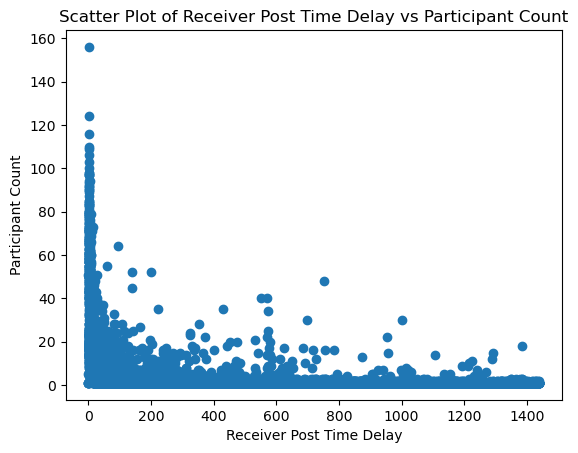

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns sender_tweet_id, receiver_post_time_delay, and Participant_count

# Create a scatter plot
plt.scatter(grouped_data_true['receiver_post_time_delay'], grouped_data_true['tweet_label'])

# Add labels and title
plt.xlabel('Receiver Post Time Delay')
plt.ylabel('Participant Count')
plt.title('Scatter Plot of Receiver Post Time Delay vs Participant Count')

# Show the plot
plt.show()


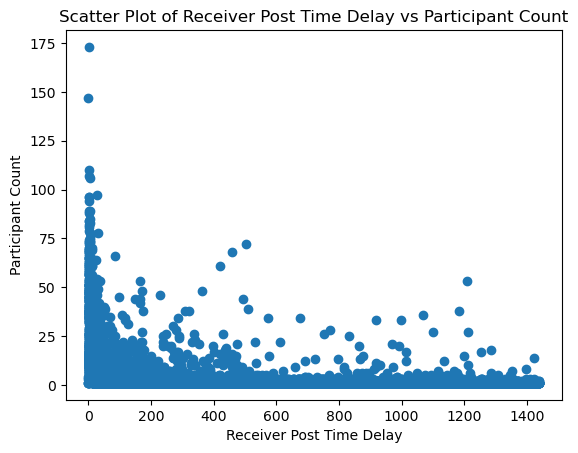

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns sender_tweet_id, receiver_post_time_delay, and Participant_count

# Create a scatter plot
plt.scatter(grouped_data_false['receiver_post_time_delay'], grouped_data_false['tweet_label'])

# Add labels and title
plt.xlabel('Receiver Post Time Delay')
plt.ylabel('Participant Count')
plt.title('Scatter Plot of Receiver Post Time Delay vs Participant Count')

# Show the plot
plt.show()


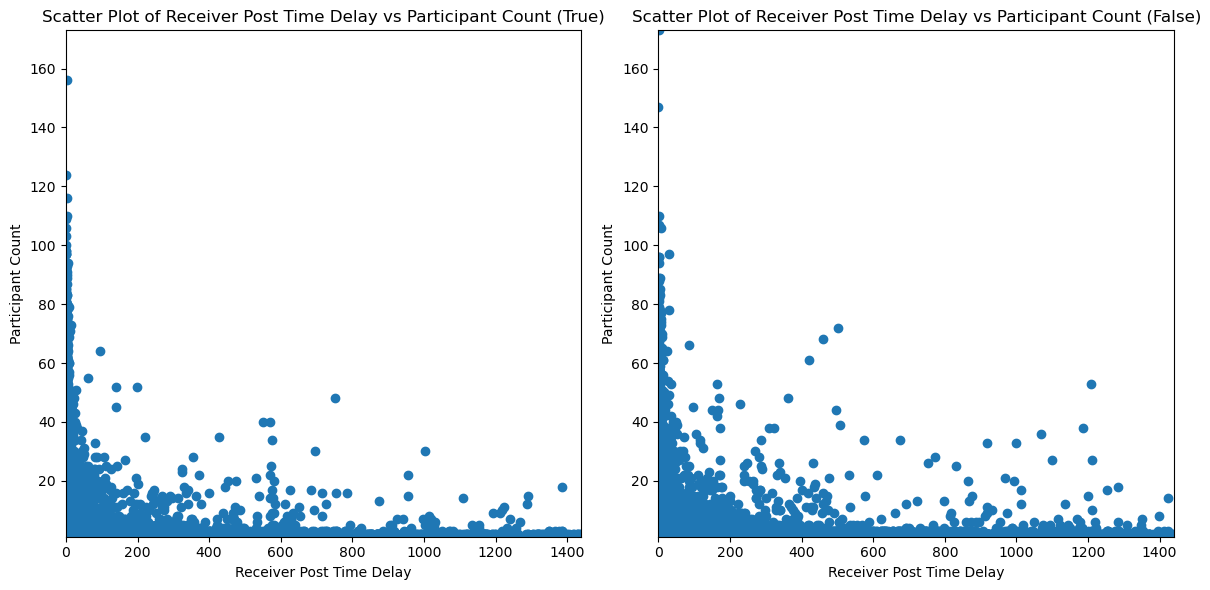

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming grouped_data_true and grouped_data_false DataFrames exist

# Get the min and max values for scaling
x_min = min(grouped_data_true['receiver_post_time_delay'].min(), grouped_data_false['receiver_post_time_delay'].min())
x_max = max(grouped_data_true['receiver_post_time_delay'].max(), grouped_data_false['receiver_post_time_delay'].max())
y_min = min(grouped_data_true['tweet_label'].min(), grouped_data_false['tweet_label'].min())
y_max = max(grouped_data_true['tweet_label'].max(), grouped_data_false['tweet_label'].max())

# Create subplots with shared x and y limits
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot
axes[0].scatter(grouped_data_true['receiver_post_time_delay'], grouped_data_true['tweet_label'])
axes[0].set_xlabel('Receiver Post Time Delay')
axes[0].set_ylabel('Participant Count')
axes[0].set_title('Scatter Plot of Receiver Post Time Delay vs Participant Count (True)')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Second scatter plot
axes[1].scatter(grouped_data_false['receiver_post_time_delay'], grouped_data_false['tweet_label'])
axes[1].set_xlabel('Receiver Post Time Delay')
axes[1].set_ylabel('Participant Count')
axes[1].set_title('Scatter Plot of Receiver Post Time Delay vs Participant Count (False)')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()